In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("mall.csv")

In [5]:
df #unsupervised data

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [6]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


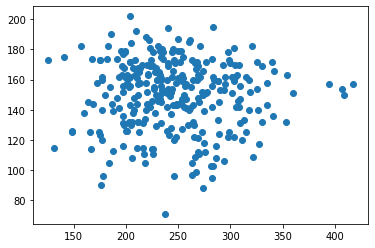

In [10]:
plt.figure()
plt.scatter(df["INCOME"],df["SPEND"])
plt.show() # how is the relationships between


# K means

In [11]:
from sklearn.cluster import KMeans


In [12]:
ke1 = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300,random_state=1)


In [13]:
ke1.fit(df) # fit model and create 3 clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [14]:
#wcss value
ke1.inertia_


297101.3764201943

In [15]:
ke1.cluster_centers_ # center cluster

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [16]:
centroids = ke1.cluster_centers_

In [19]:
centroids_df = pd.DataFrame(centroids,columns = ['X','Y']) #convert to dataframe

In [20]:
centroids_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


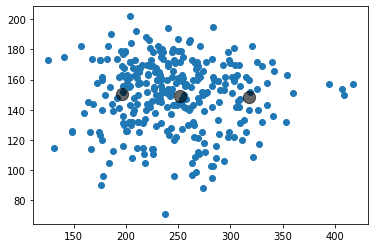

In [22]:
plt.figure()
plt.scatter(data =df,x="INCOME",y ="SPEND")
plt.scatter(centroids_df["X"],centroids_df["Y"],c="black",s =150,alpha =0.6)
plt.show() # how is the relationships between and we can check where the exet cluster makein centers
#c = cluster colour , s = size cluster size , alpha = unviseble

In [33]:
wcss = []
for i in range(1,11): 
    ke = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300,random_state=1)
    ke.fit(df)
    wcss.append(ke.inertia_)
#k-means++ = its samrt way to check

In [34]:
wcss

[868805.4785478548,
 416914.67764462065,
 297101.3764201943,
 235568.75630353513,
 193333.51167275637,
 158999.20745160058,
 135314.10167803388,
 115686.57935998778,
 102546.93727877043,
 91556.28599714936]

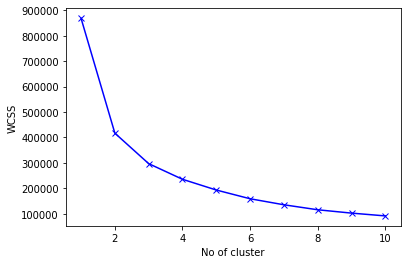

In [36]:
plt.figure()
plt.plot(range(1,11),wcss ,'bx-')
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()

In [37]:
ke = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)
# best cluster is select is 5 or 6 after that value is consantanse

In [44]:
labels = ke.fit_predict(df) # we are doing predict the model for seen the labels

In [45]:
labels

array([1, 1, 0, 1, 3, 0, 3, 1, 0, 0, 1, 2, 1, 4, 1, 0, 3, 4, 1, 1, 1, 1,
       0, 1, 0, 3, 0, 4, 3, 0, 0, 4, 0, 1, 4, 0, 3, 1, 1, 3, 3, 1, 0, 1,
       3, 3, 1, 1, 4, 1, 1, 3, 1, 0, 1, 0, 0, 1, 0, 3, 2, 3, 0, 4, 0, 0,
       4, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 3, 3, 2, 1, 1, 0,
       0, 2, 1, 0, 0, 3, 4, 4, 3, 1, 3, 1, 1, 1, 0, 1, 0, 4, 1, 1, 1, 1,
       3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 4, 1, 0, 2, 0, 1,
       3, 1, 3, 1, 4, 4, 4, 2, 3, 3, 0, 4, 4, 1, 1, 1, 1, 0, 1, 4, 1, 1,
       0, 4, 1, 0, 4, 0, 1, 3, 0, 0, 0, 2, 4, 1, 1, 0, 1, 1, 1, 0, 4, 4,
       1, 3, 4, 2, 3, 4, 3, 1, 2, 3, 1, 2, 1, 0, 3, 4, 4, 2, 0, 3, 1, 1,
       2, 1, 0, 1, 2, 1, 4, 1, 1, 1, 4, 0, 1, 1, 4, 3, 1, 3, 2, 3, 2, 1,
       3, 4, 1, 2, 2, 4, 2, 4, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 1,
       4, 2, 4, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 4, 1, 1, 1, 1, 2, 1,
       4, 4, 3, 4, 2, 2, 1, 1, 2, 1, 2, 0, 4, 1, 3, 4, 3, 0, 4, 0, 4, 3,
       0, 1, 3, 4, 0, 3, 1, 0, 4, 4, 4, 4, 2, 2, 4,

In [46]:
labels_df = pd.DataFrame(labels,columns = ['LABEl'])

In [48]:
labels_df

,LABEl
0,1
1,1
2,0
3,1
4,3
...,...
298,2
299,2
300,4
301,4


In [51]:
# concate the data with labels
df_new = pd.concat([df,pd.DataFrame({'LABEL':labels})],axis =1)

In [52]:
df_new

,INCOME,SPEND,LABEL
0,233,150,1
1,250,187,1
2,204,172,0
3,236,178,1
4,354,163,3
...,...,...,...
298,241,123,2
299,264,132,2
300,193,141,4
301,131,115,4


In [53]:
# For 5 cluster frame
ke = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)
ke.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [54]:
ke.inertia_


193333.51167275637

In [55]:
centroids1 = ke.cluster_centers_


In [56]:
centroids1

array([[199.38709677, 168.08064516],
       [249.6407767 , 159.75728155],
       [269.94444444, 115.61111111],
       [321.34615385, 153.23076923],
       [196.3       , 126.74      ]])

In [58]:
centroids1_df = pd.DataFrame(centroids1,columns=['X','Y'])

In [59]:
centroids1_df

,X,Y
0,199.387097,168.080645
1,249.640777,159.757282
2,269.944444,115.611111
3,321.346154,153.230769
4,196.300000,126.740000


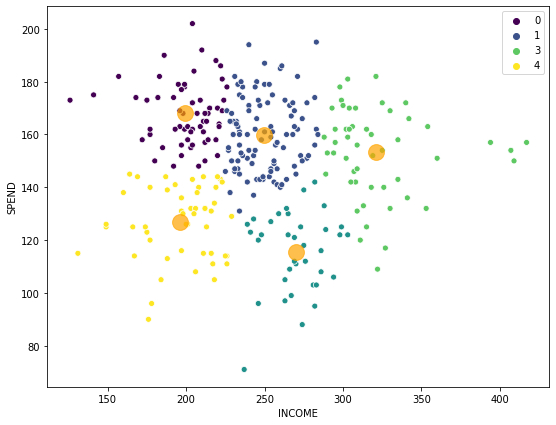

In [65]:
#createing the centroids with plot
#palette = means color patten of cluster means 0wale color same,1 wale color same
plt.figure(figsize = (9,7))
sns.scatterplot(x =df["INCOME"],y=df["SPEND"],hue =labels,palette = "viridis")
plt.scatter(centroids1_df["X"],centroids1_df["Y"],c = 'orange',s=250,alpha =0.7)
plt.show()